In [1]:
# %matplotlib qt
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
'''
# Read the file in and do the necessary formatting.
with open('putty.log', 'r') as file:
    data = file.read()
    
    # Remove the first line.
    data = data.split('\n',2)[-1]
    
    # Set column names based on the name:value pairs.
    first_line = data.split('\n', 2)[0]
    columns = first_line.split('  ')[:-2] # strip the last empty spaces
    column_names = []
    for column in columns:
        column_names.append(column.split(':')[0])
        
    print(column_names)
    
    # Reformat the whole file to a csv file.
    formatted_data = ''
    for column_name in column_names:
        formatted_data += column_name + ','
    
    # Replace the last value with a newline.
    formatted_data = formatted_data[:-1]
    formatted_data += '\n'
    
    # Go through the whole file to reformat.
    for line in data.split('\n'):
        formatted_line = ''
        for name_values in line.split('  ')[:-2]:
            formatted_line += name_values.split(':')[-1] + ','
        formatted_line = formatted_line[:-1]
        formatted_line += '\n'
        formatted_data += formatted_line
        
    # Save data to file.
    with open("data/cpg_motors.csv", "w") as text_file:
        text_file.write(formatted_data)
'''

'\n# Read the file in and do the necessary formatting.\nwith open(\'putty.log\', \'r\') as file:\n    data = file.read()\n    \n    # Remove the first line.\n    data = data.split(\'\n\',2)[-1]\n    \n    # Set column names based on the name:value pairs.\n    first_line = data.split(\'\n\', 2)[0]\n    columns = first_line.split(\'  \')[:-2] # strip the last empty spaces\n    column_names = []\n    for column in columns:\n        column_names.append(column.split(\':\')[0])\n        \n    print(column_names)\n    \n    # Reformat the whole file to a csv file.\n    formatted_data = \'\'\n    for column_name in column_names:\n        formatted_data += column_name + \',\'\n    \n    # Replace the last value with a newline.\n    formatted_data = formatted_data[:-1]\n    formatted_data += \'\n\'\n    \n    # Go through the whole file to reformat.\n    for line in data.split(\'\n\'):\n        formatted_line = \'\'\n        for name_values in line.split(\'  \')[:-2]:\n            formatted_line

In [3]:
demo_data = pd.read_csv('data/demo_motors.csv')
cpg_data = pd.read_csv('data/cpg_motors.csv')

In [4]:
# We want to plot a stable part of the CPG.
# Therefore, we locate the third peak.
cpg_to_signal = cpg_data[['TO']].values.flatten()
cpg_peaks = signal.find_peaks(cpg_to_signal)

# Desired peak index.
print(cpg_peaks[0][2])

# Find the first peak of the demo data.
demo_to_signal = demo_data[['TO']].values.flatten()
demo_peaks = signal.find_peaks(demo_to_signal)

# Desired peak index.
print(demo_peaks[0][0])

# Delete the third cpg peak - demo code peak offset from cpg data.
cpg_data = cpg_data[cpg_peaks[0][2] - demo_peaks[0][0]:]
cpg_data = cpg_data.reset_index()

1528
234


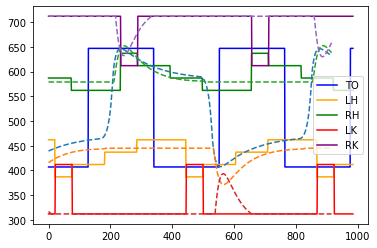

In [5]:
# We are currently not interested in the ankles.
plt.figure()
plt.plot(demo_data[['TO']], color='blue')
plt.plot(demo_data[['LH']], color='orange')
plt.plot(demo_data[['RH']], color='green')
plt.plot(demo_data[['LK']], color='red')
plt.plot(demo_data[['RK']], color='purple')

# Overlay the CPG data.
plt.plot(cpg_data[['TO']], linestyle='--')
plt.plot(cpg_data[['LH']], linestyle='--')
plt.plot(cpg_data[['RH']], linestyle='--')
plt.plot(cpg_data[['LK']], linestyle='--')
plt.plot(cpg_data[['RK']], linestyle='--')

plt.legend(['TO', 'LH', 'RH', 'LK', 'RK'])

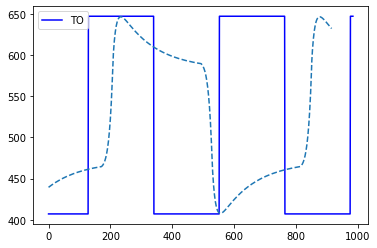

In [6]:
# Look at a specific motor.
desired_motor_name = 'TO'

plt.figure()
plt.plot(demo_data[[desired_motor_name]], color='blue')

# Overlay the CPG data.
plt.plot(cpg_data[[desired_motor_name]], linestyle='--')

plt.legend([desired_motor_name])

In [7]:
cpg_data.reset_index()

,level_0,index,TO,LH,RH,LK,RK,LA,RA
0,0,1294,439.30,415.68,579.00,316.84,712.00,0.0,0.0
1,1,1295,439.59,416.13,579.00,316.28,712.00,0.0,0.0
2,2,1296,439.87,416.56,579.00,315.72,712.00,0.0,0.0
3,3,1297,440.15,416.99,579.00,315.18,712.00,0.0,0.0
4,4,1298,440.43,417.42,579.00,314.65,712.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
912,912,2206,633.83,445.00,641.14,312.00,653.30,0.0,0.0
913,913,2207,633.39,445.00,640.44,312.00,654.58,0.0,0.0
914,914,2208,632.95,445.00,639.74,312.00,655.86,0.0,0.0
915,915,2209,632.51,445.00,639.04,312.00,657.13,0.0,0.0


## Alternatively, run the programme in the notebook and compare the results directly.

2.5
0.0
-1.5
-1.5
-1.5
-1.5
[[ 0.00e+00 -2.50e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [-2.50e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  9.00e-01  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  1.20e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 2.50e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  9.00e-01  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.20e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  2.50e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  2.50e+00  1.07e+00
   0.00e+00  0.00e+00  0.00e+0

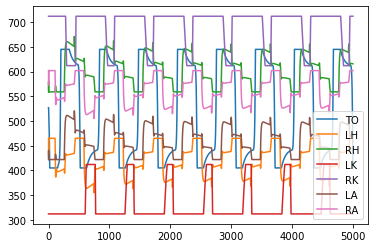

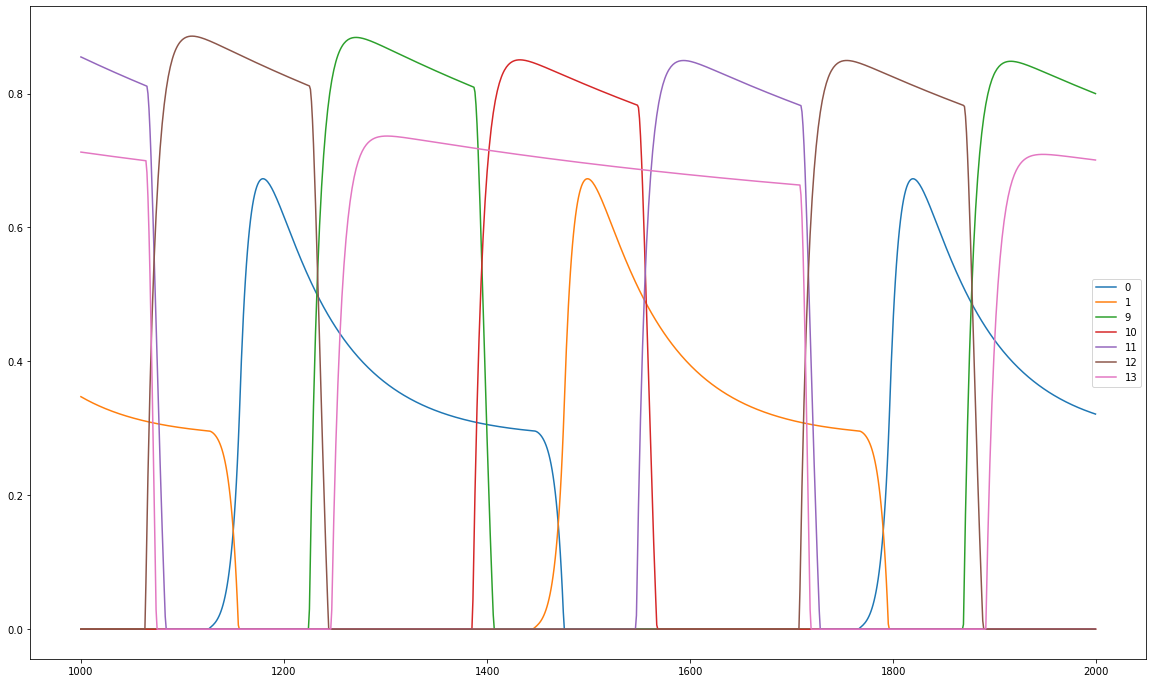

In [8]:
import matplotlib.pyplot as plt
import numpy as np

PI = 3.1415926535897932384626433832795
PI_ = 3.1415
HALF_PI = 1.5707963267948966192313216916398
TWO_PI = 6.283185307179586476925286766559
DEG_TO_RAD = 0.017453292519943295769236907684886
RAD_TO_DEG = 57.295779513082320876798154814105

mySpeed = 100
hipstep = 50
torsoStep = 120
myd = 5
myd2 = 1000
myd3 = 20
hight_factor = 2

delta_phi = 3

time_step = 0.1
tau = 1  # same effect as tau

TO = 0
LH = 1
RH = 2
LK = 3
RK = 4
LA = 5
RA = 6

motor_id = {
    0: 'TO',
    1: 'LH',
    2: 'RH',
    3: 'LK',
    4: 'RK',
    5: 'LA',
    6: 'RA'
}

knee_shift = 200
hip_shift = 75
ankle_shift = 30
torso_shift = 0
initial_pos = [512 - torso_shift + 15, 512 - hip_shift + 8, 512 + hip_shift - 8, 512 - knee_shift, 512 + knee_shift,
               512 - ankle_shift, 512 + ankle_shift + 10]
'''
int initial_pos[7]={ 512-torso_shift+15 , 512-hip_shift+8, 512+hip_shift-8, 512-knee_shift , 512+knee_shift , 512-ankle_shift , 512+ankle_shift+10};
// Works fine: int initial_pos[7]={ 512-torso_shift+15 , 512-hip_shift+8, 512+hip_shift-8, 512-knee_shift , 512+knee_shift , 512-ankle_shift , 512+ankle_shift+10};
int phi[7] = {60,0,0,-180,-180,135,-135}; // [deg]
int range[7]={150,50,50,50,50,25,25};
'''

'''
/******************************************************/ 
#struct RSneuron 
/******************************************************/
'''


class RSneuron:
    def __init__(self):
        self.x = 0  # membrane potential
        self.x_old = 0  # old membrane potential --> for calculating the new one
        self.y = 0  # output response of neuron
        # tau = 1   # time const.
        self.s = 0.0  # impulse rate | outside network stimulation (we can set it) # Increase: amplitude increase
        self.b = 2.5  # adaptation coefficient b = 0, 2.5, inf # increase: decreases amplitude, increases frequ.
        self.x_prime = 0  # degree of adaptation / rate of change # No interesting behavior changes
        self.x_prime_old = 0
        self.y_old = 0
        self.T = 100  # prev. 12 time constant for adaptation T = 2.5, 12, inf # time period / 1/f
        self.threshold = 0.0  # threshold # derivative at start is lower


number_neurons = 14

rs_neuron = []
for i in range(0, number_neurons):
    rs_neuron.append(RSneuron())

delta_phi = 3

# Setup:
# Torso

rs_neuron[0].T = 28
rs_neuron[0].s = 1.0
rs_neuron[1].T = 28
rs_neuron[1].s = 1.0

# LK
# neuron | LK_dt:
rs_neuron[2].b = 1
rs_neuron[2].threshold = 0.75

# LH
# neuron | LH_dt:
rs_neuron[3].b = 5.0

# RK
# neuron | RK_dt:
rs_neuron[4].b = 1
rs_neuron[4].threshold = 0.75

# RH
# neuron | RH_dt:
rs_neuron[5].b = 5.0

# Recurrent
# connection
# RH
rs_neuron[6].b = 0.5
# rs_neuron[6].threshold = 0.7

# Hip
# forward
# neuron
rs_neuron[7].b = 0.5
rs_neuron[7].threshold = 9  # 39.5 # 38 - 39.7 # 7: still
# too
# big
# curve
rs_neuron[7].T = 100
# rs_neuron[7].s = -1

# Hip
# output neuron
rs_neuron[8].b = 0.00000002
rs_neuron[8].threshold = 0.0  # 39.5 # 38 - 39.7 # 7: still
rs_neuron[8].T = 1000
# rs_neuron[7].s = -1

print(rs_neuron[0].b)
print(rs_neuron[0].threshold)

connection_mat = np.zeros((number_neurons, number_neurons))

rs_neuron[9].b = 1
rs_neuron[9].s = 1.0
rs_neuron[10].b = 1
rs_neuron[10].s = 1.0
rs_neuron[11].b = 1.0
rs_neuron[11].s = 1.0
rs_neuron[12].b = 1
rs_neuron[12].s = 1.0

rs_neuron[13].b = 0.7
rs_neuron[13].s = 1.0




# CONNECTION
# INITIALIZATION
# Connect both TO neurons:
connection_mat[0][1] = -2.5
connection_mat[1][0] = -2.5

# Connect
# LK to TO:
connection_mat[2][9] = 1.2
connection_mat[2][2] = 0.9

# Connect
# LH to TO:
connection_mat[3][0] = 2.5

# Connect
# RK to TO:
# connection_mat[4][1] = 2.5
connection_mat[4][11] = 1.2
connection_mat[4][4] = 0.9

# Connect
# RH to TO:
connection_mat[5][1] = 2.5

# Recurrent
# RH
connection_mat[6][5] = 2.5
connection_mat[6][6] = 1.07

# RH_move_fw
connection_mat[7][6] = 2.5

# Hip
# output neuron
connection_mat[8][7] = 2.5

subnet_dict = {
    1: 9,
    2: 10,
    3:11,
    4:12
}

# Subnetwork:
# connection_mat[9][0] = -2.5
'''
connection_mat[subnet_dict[3]subnet_dict[2]] = -2.5
connection_mat[subnet_dict[4]subnet_dict[3]] = 
connection_mat[subnet_dict[1]subnet_dict[4]]
connection_mat[subnet_dict[3]subnet_dict[1]]
connection_mat[subnet_dict[1]subnet_dict[3]]
connection_mat[subnet_dict[4]subnet_dict[2]]
connection_mat[subnet_dict[2]subnet_dict[4]]
'''

a1 = -1.5
a2 = -6000000 # -100000000000
a3 = 0

# Column to Row
A = [[0, a1, a2, a3], 
     [a3, 0, a1, a2],
     [a2, a3, 0, a1],
     [a1, a2, a3, 0]]
connection_mat[9:13,9:13] = A

print(connection_mat[9][10])
print(connection_mat[10][11])
print(connection_mat[11][12])
print(connection_mat[12][9])

'''
connection_mat[9][10] = a1
connection_mat[10][11] = a1
connection_mat[11][12] = a1
connection_mat[12][9] = a1

connection_mat[9][11] = a2
connection_mat[10][12] = a2
connection_mat[11][9] = a2
connection_mat[12][10] = a2

connection_mat[9][12] = a3
connection_mat[10][9] = a3
connection_mat[11][10] = a3
connection_mat[12][11] = a3
'''


connection_mat[13][12] = -2.5

# print(connection_mat)

'''
connection_mat[11][10] = -2.5
connection_mat[12][11] = -2.5
connection_mat[9][12] = -2.5
connection_mat[11][9] = -2.5
connection_mat[9][11] = -2.5
connection_mat[12][10] = -2.5
connection_mat[10][12] = -2.5
'''

# Subnet for the
# 9:  1: 
# 10: 2: 
# 11: 3: 
# 12: 4: 


print(connection_mat)

prev_torso = 0

print_neuron_output = False

time_length = 5000

TO_current = 0
LH_current = 0
RH_current = 0
LK_current = 0
RK_current = 0
LA_current = 0
RA_current = 0

all_current_list = np.zeros((7, time_length))
print(all_current_list.shape)

all_neurons_recording = np.zeros((number_neurons, time_length))


for t in range(0, time_length):
    # Connection: Input from j to i! (connection_mat[1][2] : If neuron 2 is firing, neuron 1 receives an input depending on the connection strength defined in connection_mat[1][2].

    for i in range(0, number_neurons):
        network_stimulus = 0
        for j in range(0, number_neurons):
            network_stimulus += connection_mat[i][j] * rs_neuron[j].y

        stimulus = network_stimulus + rs_neuron[i].s

        # Calculate membrane potential
        rs_neuron[i].x = (1 - time_step / tau) * rs_neuron[i].x_old + time_step * (
                stimulus - (rs_neuron[i].b * rs_neuron[i].x_prime_old)) / tau

        # Calculate adaptation rate.
        rs_neuron[i].x_prime = (1 - time_step / rs_neuron[i].T) * rs_neuron[i].x_prime_old + time_step * rs_neuron[
            i].y / rs_neuron[i].T

        # Calculate firing rate / "output" activation
        rs_neuron[i].y = max(0.0, rs_neuron[i].x_old - rs_neuron[i].threshold)

        # Saving values for future calculations.
        rs_neuron[i].x_old = rs_neuron[i].x
        rs_neuron[i].x_prime_old = rs_neuron[i].x_prime
        
        all_neurons_recording[i, t] = rs_neuron[i].y

    # TO
    torso = rs_neuron[0].y - rs_neuron[1].y
    left_hip =  3*rs_neuron[9].y + 2*rs_neuron[10].y + 1*rs_neuron[11].y
    right_hip = - (3*rs_neuron[11].y + 2*rs_neuron[12].y + 1*rs_neuron[9].y)
    left_ankle = - 0.88*(3.0*rs_neuron[11].y + 2.0*rs_neuron[12].y + 1.0*rs_neuron[9].y);
    right_ankle = 0.88*(3.0*rs_neuron[9].y + 2.0*rs_neuron[10].y + 1.0*rs_neuron[11].y);

    TO_current = max(405, min(645, initial_pos[TO] - torso*torsoStep*2.4))
    LK_current = initial_pos[LK] - (hipstep * max(-2.0, -4.1 * rs_neuron[2].y))
    LH_current = initial_pos[LH] + 20 - (hipstep * 0.7* left_hip) #initial_pos[LH] - (hipstep * min(1.3, 1.3 * rs_neuron[3].y))
    RK_current = initial_pos[RK] - (hipstep * min(2.0, 4.1 * rs_neuron[4].y))
    RH_current = initial_pos[RH] - 20 - (hipstep * 0.7* right_hip)  #initial_pos[RH] - (hipstep * max(-1.3, -1.3 * rs_neuron[5].y))
    LA_current = initial_pos[LA] - 60.0 - (hipstep * 0.7* left_ankle)
    RA_current = initial_pos[RA] + 50.0 - (hipstep * 0.7* right_ankle)
    
    
    all_current_list[0, t] = TO_current
    all_current_list[1, t] = LH_current
    all_current_list[2, t] = RH_current
    all_current_list[3, t] = LK_current
    all_current_list[4, t] = RK_current
    all_current_list[5, t] = LA_current
    all_current_list[6, t] = RA_current

fig, ax = plt.subplots()
for motor in range(0, 7):
    ax.plot(range(0, time_length), all_current_list[motor], label=motor_id[motor])
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20,12))
for neuron in range(0, number_neurons):
    if neuron in [0, 1, 9, 10, 11, 12, 13]:
        ax.plot(range(0, time_length)[1000:2000], all_neurons_recording[neuron, 1000:2000], label=neuron)
ax.legend()
plt.show()


In [9]:
# Start from 3rd curve:
print(all_current_list.shape)
all_current_list_cut =  all_current_list[:, 1927:] #2022 #1800 to align with experimental cpg
# print(all_current_list_cut.shape[1])
all_current_list_cut = np.delete(all_current_list_cut, np.arange(0, all_current_list_cut.shape[1], 3), axis=1)

time_length_cut = all_current_list_cut.shape[1]
print(time_length_cut)

(7, 5000)
2048


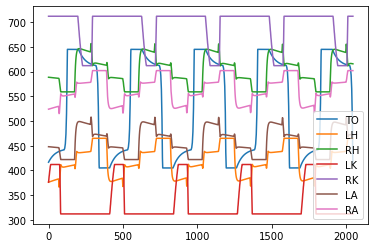

In [10]:
fig, ax = plt.subplots()
for motor in range(0, 7):
    ax.plot(range(0, time_length_cut), all_current_list_cut[motor], label=motor_id[motor])
ax.legend()
plt.show()

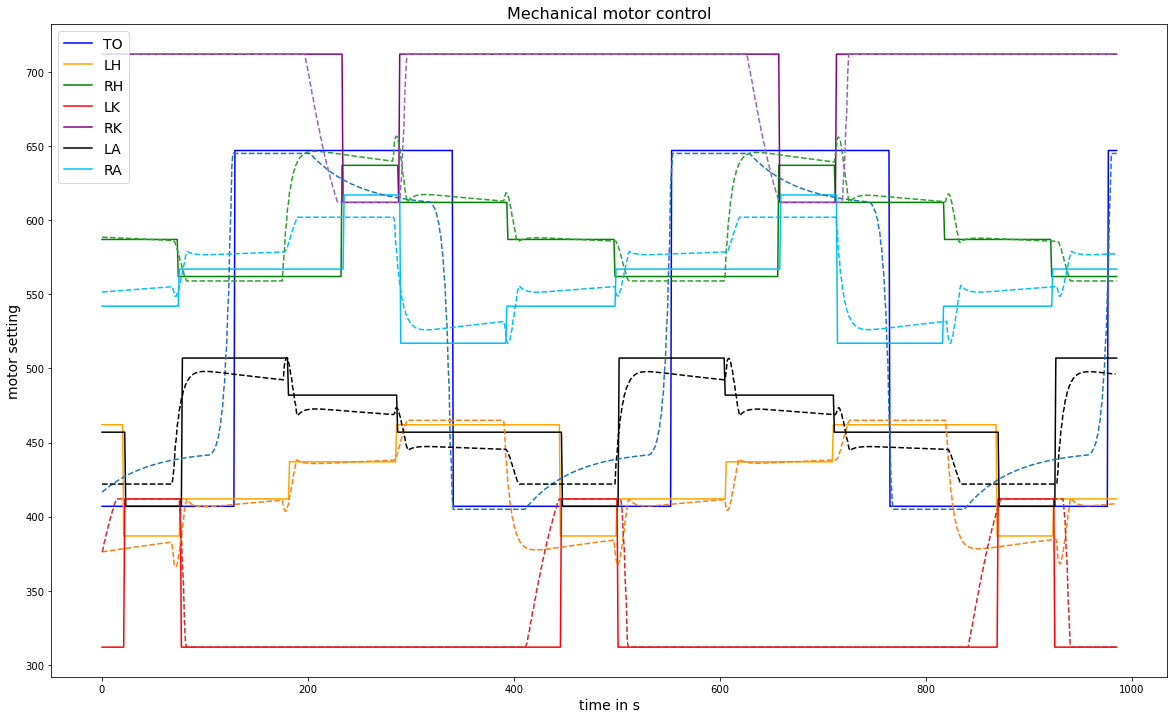

In [38]:
# We are currently not interested in the ankles.
fig = plt.figure(figsize=(20, 12))
plt.plot(demo_data[['TO']], color='blue')
plt.plot(demo_data[['LH']], color='orange')
plt.plot(demo_data[['RH']], color='green')
plt.plot(demo_data[['LK']], color='red')
plt.plot(demo_data[['RK']], color='purple')
plt.plot(demo_data[['LA']], color='k')
plt.plot(demo_data[['RA']], color='deepskyblue')

'''
# Overlay the CPG data.
plt.plot(cpg_data[['TO']], linestyle='-.')
plt.plot(cpg_data[['LH']], linestyle='-.')
plt.plot(cpg_data[['RH']], linestyle='-.')
plt.plot(cpg_data[['LK']], linestyle='-.')
plt.plot(cpg_data[['RK']], linestyle='-.')
'''

# Overlay the CPG data from the Python notebook.

for i in range(0, 5): # skip the ankles
    plt.plot(all_current_list_cut[i, :len(demo_data[['TO']])], linestyle='--')
plt.plot(all_current_list_cut[6,965:1950], linestyle='--', c='deepskyblue')
plt.plot(all_current_list_cut[5,965:1950], linestyle='--', c='k')

plt.legend(['TO', 'LH', 'RH', 'LK', 'RK', 'LA', 'RA'], fontsize = 14)

plt.title('Mechanical motor control', fontsize = 16)
plt.xlabel('time in s', fontsize = 14)
plt.ylabel('motor setting', fontsize = 14)

plt.show()
fig.savefig('only_motor_plot.png')

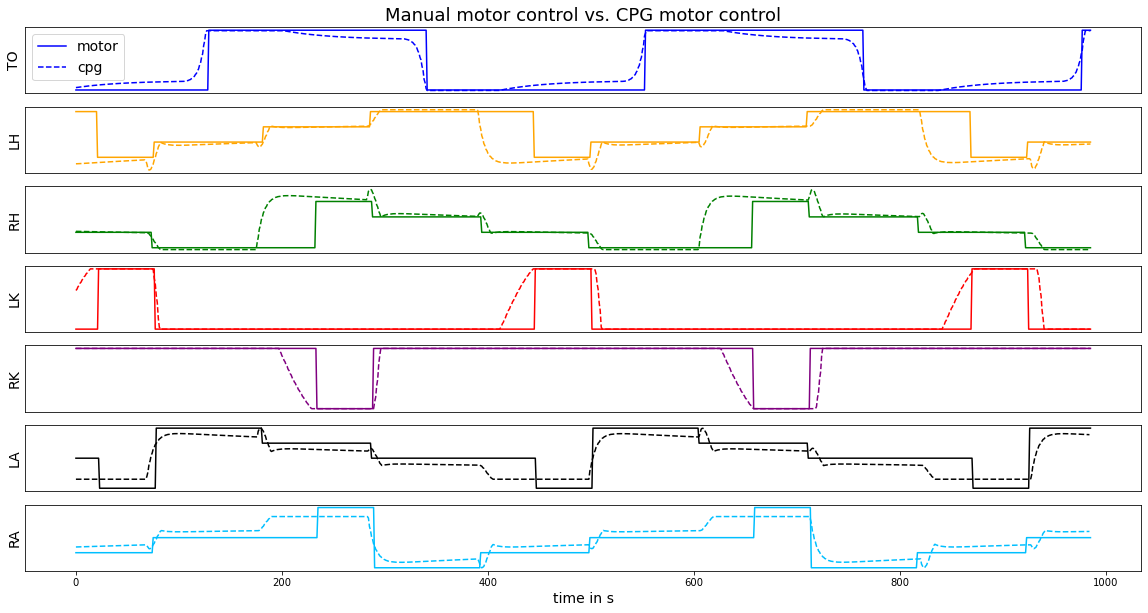

In [66]:
fig, ax = plt.subplots(7, figsize=(20, 10))
ax[0].set_title('Manual motor control vs. CPG motor control', fontsize = 18)
ax[0].plot(demo_data[['TO']], color='blue')
ax[0].plot(all_current_list_cut[0,:len(demo_data[['TO']])], linestyle='--', c='blue')
ax[1].plot(demo_data[['LH']], color='orange')
ax[1].plot(all_current_list_cut[1,:len(demo_data[['LH']])], linestyle='--', c='orange')
ax[2].plot(demo_data[['RH']], color='green')
ax[2].plot(all_current_list_cut[2,:len(demo_data[['RH']])], linestyle='--', c='green')
ax[3].plot(demo_data[['LK']], color='red')
ax[3].plot(all_current_list_cut[3,:len(demo_data[['LK']])], linestyle='--', c='red')
ax[4].plot(demo_data[['RK']], color='purple')
ax[4].plot(all_current_list_cut[4,:len(demo_data[['RK']])], linestyle='--', c='purple')
ax[5].plot(demo_data[['LA']], color='k')
ax[5].plot(all_current_list_cut[5,965:1950], linestyle='--', c='k')
ax[6].plot(demo_data[['RA']], color='deepskyblue')
ax[6].plot(all_current_list_cut[6,965:1950], linestyle='--', c='deepskyblue')





#plt.title('Mechanical motor control', fontsize = 16)
#plt.xlabel('time in s', fontsize = 14)
ax[0].set_ylabel('TO', fontsize = 14)
ax[1].set_ylabel('LH', fontsize = 14)
ax[2].set_ylabel('RH', fontsize = 14)
ax[3].set_ylabel('LK', fontsize = 14)
ax[4].set_ylabel('RK', fontsize = 14)
ax[5].set_ylabel('LA', fontsize = 14)
ax[6].set_ylabel('RA', fontsize = 14)
ax[0].legend(['motor', 'cpg'], fontsize = 14)
ax[6].set_xlabel('time in s', fontsize = 14)

for i in range(0, 6):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[6].set_yticks([])

plt.show()
fig.savefig('all_combined.png', dpi=200)